In [1]:
#TODO: try out BERT and LDA for topic modelling, calculate out the metrics and compare the models

#LDA is unsupervised learning which doesnt require labeled data to train
#BERT is a pretrained model which is a supervised learning method, requires labeled data to train

#LDA can provide insights to the underlying pattern in the data, resulting topics are easily interpreted by humans
#BERT can provide more accurate results but requires labeled data and significant computation resources


In [2]:
#import preprocessed file and sentiment analysis


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
#from transformers import AutoModel

import gensim
from gensim.models import Phrases
#Prepare objects for LDA gensim implementation
from gensim import corpora
#Running LDA
from gensim import models

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../datasets/clean 21 march.csv')
df.head()

,Unnamed: 0,Sentiment,Time,Text,cleaned
0,0,positive,18/6/21,This is a very healthy dog food. Good for thei...,"['healthy', 'dog', 'food', 'good', 'digestion'..."
1,1,positive,7/7/21,I've been very pleased with the Natural Balanc...,"['pleased', 'natural', 'balance', 'dog', 'food..."
2,2,positive,18/6/21,"Before I was educated about feline nutrition, ...","['educated', 'feline', 'nutrition', 'allowed',..."
3,3,positive,7/7/21,"My holistic vet recommended this, along with a...","['holistic', 'vet', 'recommended', 'this', 'al..."
4,4,positive,1/7/21,I bought this coffee because its much cheaper ...,"['bought', 'coffee', 'much', 'cheaper', 'ganoc..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5444 non-null   int64 
 1   Sentiment   5444 non-null   object
 2   Time        5444 non-null   object
 3   Text        5444 non-null   object
 4   cleaned     5444 non-null   object
dtypes: int64(1), object(4)
memory usage: 212.8+ KB


In [7]:
df['Time'] = pd.to_datetime(df['Time'])

In [8]:
df['Time'].min()

Timestamp('2017-07-12 00:00:00')

In [9]:
df['Time'].max()

Timestamp('2021-12-10 00:00:00')

In [10]:
df['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [11]:
df_positive = df[df['Sentiment'] == 'positive']

In [12]:
df_negative = df[df['Sentiment'] == 'negative']


In [13]:
len(df_positive) #4030 rows

4030

In [115]:
len(df_negative) #1414 rows

1414

# 2. LDA


In [14]:
df_positive

,Unnamed: 0,Sentiment,Time,Text,cleaned
0,0,positive,2021-06-18,This is a very healthy dog food. Good for thei...,"['healthy', 'dog', 'food', 'good', 'digestion'..."
1,1,positive,2021-07-07,I've been very pleased with the Natural Balanc...,"['pleased', 'natural', 'balance', 'dog', 'food..."
2,2,positive,2021-06-18,"Before I was educated about feline nutrition, ...","['educated', 'feline', 'nutrition', 'allowed',..."
3,3,positive,2021-07-07,"My holistic vet recommended this, along with a...","['holistic', 'vet', 'recommended', 'this', 'al..."
4,4,positive,2021-01-07,I bought this coffee because its much cheaper ...,"['bought', 'coffee', 'much', 'cheaper', 'ganoc..."
...,...,...,...,...,...
4444,4444,positive,2021-02-19,I was super excited to find this online for a ...,"['super', 'excited', 'find', 'online', 'better..."
4445,4445,positive,2021-10-01,I was getting these for my pitbull mix from Wa...,"['getting', 'pitbull', 'mix', 'walmart', 'arou..."
4448,4448,positive,2021-02-24,If you love couscous but hate paying the price...,"['love', 'couscous', 'hate', 'paying', 'price'..."
4450,4450,positive,2020-12-14,My daughter teaches kindergarten and I help he...,"['daughter', 'teach', 'kindergarten', 'help', ..."


In [15]:
import ast
tokens = []
for sentence in df_positive['cleaned']:
    tokens.append(ast.literal_eval(sentence))
    

In [118]:
len(tokens)

4030

In [1]:
#tokens

In [16]:
import gensim.corpora as corpora


In [17]:
import gensim.corpora as corpora
# training a bi gram model in order to include those bigrams as tokens who occured at least 6 times
# in the whole dataset
bigram = gensim.models.Phrases(tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [18]:
# including bigrams as tokens 
sents = [ bigram_mod[token] for token in tokens]

In [2]:
#sents

In [19]:
# Create Dictionary to keep track of vocab
dct = corpora.Dictionary(tokens)

In [20]:
print('Unique words before filtering/after pre-processing', len(dct))


Unique words before filtering/after pre-processing 9330


In [21]:
# no_below= 30
# filter the words that occure in less than 20 documents and in more the 30% of documents
#dct.filter_extremes(no_below= 20, no_above = 0.3)
#print('Unique words after filtering', len(dct))

# Create Corpus(Database)
corpus = [dct.doc2bow(sent) for sent in sents]

tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [22]:
#cohernece score quite low...

from gensim.models import CoherenceModel
import time
import os

#randomstate = 12
scores = []
for k in range(3,15):
    # LDA model
    lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, num_topics=k, 
                                                 id2word=dct, random_state=12)
    # to calculate score for coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=sents, dictionary=dct, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(k, coherence_lda)
    scores.append(coherence_lda)

3 0.4159218444794672
4 0.40100300354780677
5 0.43895931929756243
6 0.40016115452951423
7 0.43928109311044955
8 0.4627271921369871
9 0.4189804815007821
10 0.3679332231286364
11 0.3880381151395225
12 0.3788747804606136
13 0.3793246538820486
14 0.38807202736908


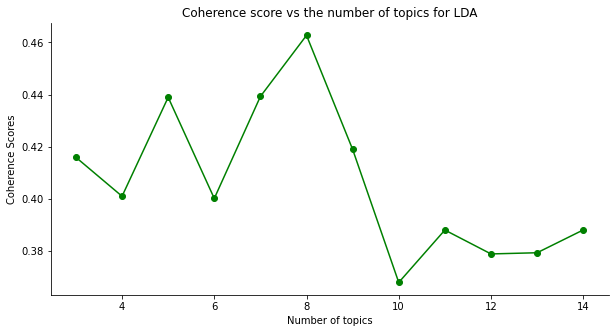

Becuase of the highest coherence the optimum number of topics are:  8


In [23]:
selected_topics = np.argmax(scores)+3

plt.figure(figsize=(10, 5))
plt.plot(list(range(3,15)), scores, marker='o', color='green')
sns.despine(top=True, right=True, left=False, bottom=False)

plt.locator_params(integer=True)
plt.title('Coherence score vs the number of topics for LDA')
plt.xlabel('Number of topics')
plt.ylabel('Coherence Scores')
plt.savefig('lda_scores.jpg')
plt.show()

print('Becuase of the highest coherence the optimum number of topics are: ', selected_topics)

In [26]:
import pyLDAvis.gensim_models

selected_topics=8
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dct, num_topics=selected_topics,\
                                           random_state=12, chunksize=128, passes=10 )

pyLDAvis.enable_notebook()
results = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dct, sort_topics=False)
pyLDAvis.save_html(results, 'ldavis_english' +'.html')
results

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.055224  0.011042       1        1   4.239451
1      0.069268  0.013783       2        1   5.567958
2     -0.164895 -0.202730       3        1  27.223196
3      0.057096  0.011986       4        1   4.407913
4     -0.262300  0.141582       5        1  36.906081
5      0.075515  0.018922       6        1   5.675201
6      0.048525  0.008602       7        1   3.491889
7      0.121567 -0.003187       8        1  12.488311, topic_info=           Term       Freq      Total Category  logprob  loglift
121      coffee  54.000000  54.000000  Default  30.0000  30.0000
641         tea  42.000000  42.000000  Default  29.0000  29.0000
67      quality  41.000000  41.000000  Default  28.0000  28.0000
3           dog  35.000000  35.000000  Default  27.0000  27.0000
120     cheaper  30.000000  30.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1053  packaging   7.413346   7.936999   Topic8  -5.6575   2.0121
1946  fantastic   7.160874   7.684171   Topic8  -5.6922   2.0098
333      strong  12.094094  13.674290   Topic8  -5.1681   1.9576
641         tea  21.826798  42.877173   Topic8  -4.5777   1.4052
15    different   7.986024  10.580450   Topic8  -5.5831   1.7991

[329 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
155       3  0.128705         ...
155       5  0.868756         ...
564       8  0.963982        able
280       1  0.920778  absolutely
1117      1  0.968796  aftertaste
...     ...       ...         ...
255       2  0.885828       wheat
1803      1  0.716584       which
1762      7  0.510484        will
1530      2  0.981029     wrapper
2173      6  0.940814       wrong

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [27]:
top_words_df = pd.DataFrame()
for k in range(selected_topics):
  # top words with it's weight for a given id k 
  top_words = lda_model.show_topic(topicid=k)
  
  # only keep the word and discard the weight
  top_words_df['Topic {}'.format(k)] = [pair[0] for pair in top_words]
top_words_df


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,ounce,again,box,milk,price,coffee,syrup,quality
1,bread,purchased,price,jar,store,tea,carry,dog
2,quick,fast,order,paid,amazon,husband,place,cheaper
3,house,walmart,great,gallon,product,green,live,deal
4,baking,flour,lot,tasted,great,trying,powder,tea
5,compared,package,shipping,slightly,good,starbucks,ginger,cat
6,bargain,pasta,too,cannot,find,packet,considering,size
7,soon,delivery,good,butter,love,canned,outstanding,value
8,child,often,product,spicy,use,instant,expected,cooky
9,absolutely,cheese,big,comparable,best,super,reviewer,save
